In [1]:
import numpy as np
def ecdf(data):
    # length of the data
    n = len(data)

    # sort the data (x)
    x= np.sort(data)

    # y-data
    y = np.arange(1, n+1) / n

    return x, y

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris.data, iris.target],
                 columns=iris.feature_names+['target'])

df['species']=df['target'].apply(lambda x:'setosa' if x==0 else('versicolor' if x==1 else 'virginica'))

print(df.head())
print(df.columns)

versicolor_petal_length = df[df['species']=='versicolor'].loc[:,'petal length (cm)']
setosa_petal_length = df[df['species']=='setosa'].loc[:,'petal length (cm)']
virginica_petal_length = df[df['species']=='virginica'].loc[:,'petal length (cm)']

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')


In [2]:
percentiles = [2.5, 25, 50, 75, 97.5]
percentiles_vers = np.percentile(versicolor_petal_length, percentiles)
print(percentiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## plotting percentiles

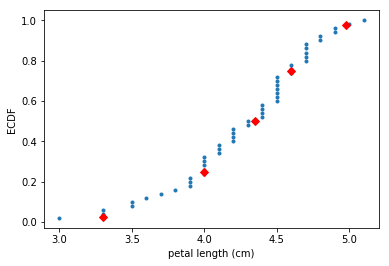

In [3]:
x_vers, y_vers = ecdf(versicolor_petal_length)
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

plt.plot(percentiles_vers, np.array(percentiles)/100, marker='D', color='red', linestyle='none')

plt.show()